In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def read_raw(name="train", path="../data/raw/"):
    texts = []
    with open(path + name + "_text.txt", "r") as f:
        for line in f:
            texts.append(line)
    with open(path + name + "_labels.txt", "r") as f:
        labels = []
        for line in f:
            labels.append(line)
    return texts, labels

def make_df(texts, labels):
    df = pd.DataFrame({"text": texts, "label": labels})
    df["label"] = df["label"].apply(lambda x: x.strip())
    df["label"] = df["label"].apply(lambda x: int(x))
    return df

def make_df_from_raw(name="train", path="../data/raw/"):
    texts, labels = read_raw(name, path)
    df = make_df(texts, labels)
    return df

train = make_df_from_raw("train")
test = make_df_from_raw("test")
val = make_df_from_raw("val")

In [48]:
train.to_csv("../data/bronze/train.csv", index=False)
test.to_csv("../data/bronze/test.csv", index=False)
val.to_csv("../data/bronze/val.csv", index=False)

In [49]:
mapping = pd.read_csv("../data/raw/mapping.txt", sep="\t", header=None)
mapping.columns = ["label", "emoji", "name", "unk"]
mapping = mapping.drop(columns=["unk"])

mapping.to_csv("../data/bronze/mapping.csv", index=False)

mapping.head()

,label,emoji,name
0,0,❤,_red_heart_
1,1,😍,_smiling_face_with_hearteyes_
2,2,😂,_face_with_tears_of_joy_
3,3,💕,_two_hearts_
4,4,🔥,_fire_


In [50]:
train

,text,label
0,Sunday afternoon walking through Venice in the...,12
1,Time for some BBQ and whiskey libations. Chomp...,19
2,Love love love all these people ️ ️ ️ #friends...,0
3,"️ ️ ️ ️ @ Toys""R""Us \n",0
4,Man these are the funniest kids ever!! That fa...,2
...,...,...
44995,Here to celebrate the Nunez wedding! Love my b...,0
44996,1 night in Paris.... Wait... @ Paris Las Vegas...,1
44997,Be safe this weekend everyone. #happylaborday ...,11
44998,"Pizza (@ Five50 - @user in Las Vegas, NV) \n",1


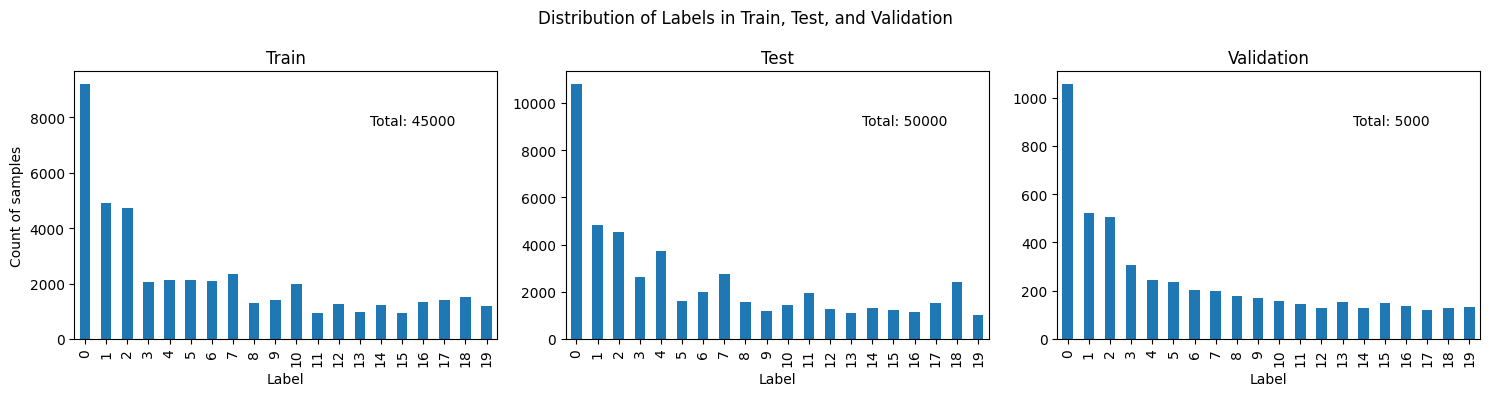

In [77]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

fig.suptitle("Distribution of Labels in Train, Test, and Validation")

for df, i, name in zip([train, test, val], range(3), ["Train", "Test", "Validation"]):
    df["label"].value_counts().sort_index().plot(kind="bar", ax=axs[i])
    axs[i].set_title(name)

    # text with total number in the top right corner
    total = f"Total: {df.shape[0]}"
    axs[i].text(0.7, 0.8, total, transform=axs[i].transAxes)

    # set x label
    axs[i].set_xlabel("Label")

axs[0].set_ylabel("Count of samples")

plt.tight_layout()
plt.savefig("figures/label-distribution.pdf")

In [93]:
latex_table = mapping.copy()
latex_table["name"] = latex_table["name"].str.lower()
latex_table["emoji"] = latex_table["name"]\
    .apply(lambda x: x[1:-1]) \
    .apply(lambda x: x.replace("_", "-")) \
    .apply(lambda x: "\emoji{" + x +"}")
latex_table["name"] = latex_table["name"]\
    .str.replace("_", "\\_")\
    .apply(lambda x: "\\texttt{" + x + "}")
latex_table.columns = ["Label", "Emoji", "Name"]
latex_table = latex_table.to_latex(index=False)

print(latex_table)

\begin{tabular}{rll}
\toprule
Label & Emoji & Name \\
\midrule
0 & \emoji{red-heart} & \texttt{\_red\_heart\_} \\
1 & \emoji{smiling-face-with-hearteyes} & \texttt{\_smiling\_face\_with\_hearteyes\_} \\
2 & \emoji{face-with-tears-of-joy} & \texttt{\_face\_with\_tears\_of\_joy\_} \\
3 & \emoji{two-hearts} & \texttt{\_two\_hearts\_} \\
4 & \emoji{fire} & \texttt{\_fire\_} \\
5 & \emoji{smiling-face-with-smiling-eyes} & \texttt{\_smiling\_face\_with\_smiling\_eyes\_} \\
6 & \emoji{smiling-face-with-sunglasses} & \texttt{\_smiling\_face\_with\_sunglasses\_} \\
7 & \emoji{sparkles} & \texttt{\_sparkles\_} \\
8 & \emoji{blue-heart} & \texttt{\_blue\_heart\_} \\
9 & \emoji{face-blowing-a-kiss} & \texttt{\_face\_blowing\_a\_kiss\_} \\
10 & \emoji{camera} & \texttt{\_camera\_} \\
11 & \emoji{united-states} & \texttt{\_united\_states\_} \\
12 & \emoji{sun} & \texttt{\_sun\_} \\
13 & \emoji{purple-heart} & \texttt{\_purple\_heart\_} \\
14 & \emoji{winking-face} & \texttt{\_winking\_face\_} \\
15 